In [1]:
# ===============================
# 📌 1) Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [3]:
# ===============================
# 📌 2) Load CSV Data
# ===============================

# Use your full path so it works!
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\jpmorgan\Nat_Gas.csv')

print("First 5 rows:")
print(df.head())


First 5 rows:
      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


In [5]:
# ===============================
# 📌 3) Parse Dates & Set Index
# ===============================
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

print("\nData Info:")
print(df.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22416\511742636.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


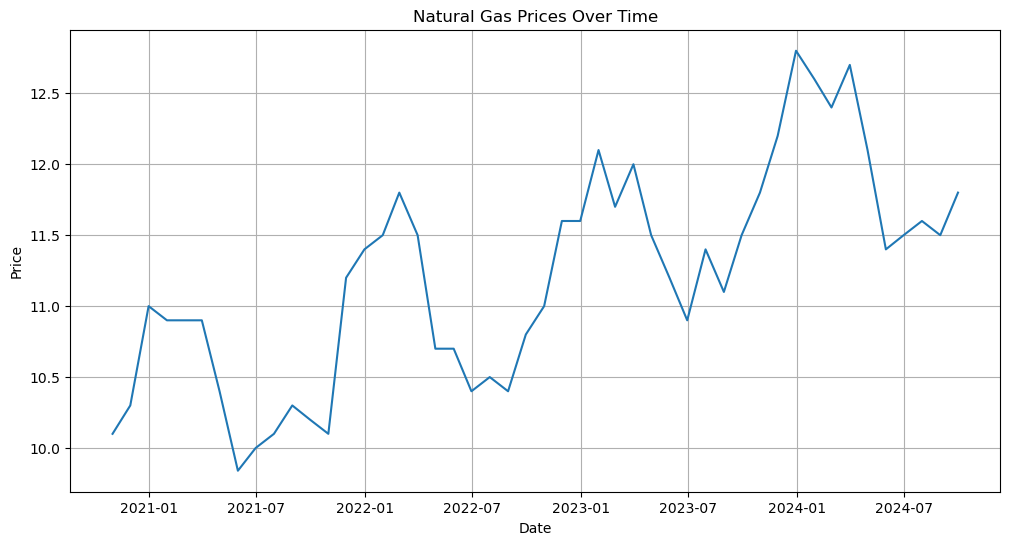

In [7]:
# ===============================
# 📌 4) Quick Plot
# ===============================
plt.figure(figsize=(12,6))
plt.plot(df['Prices'])
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


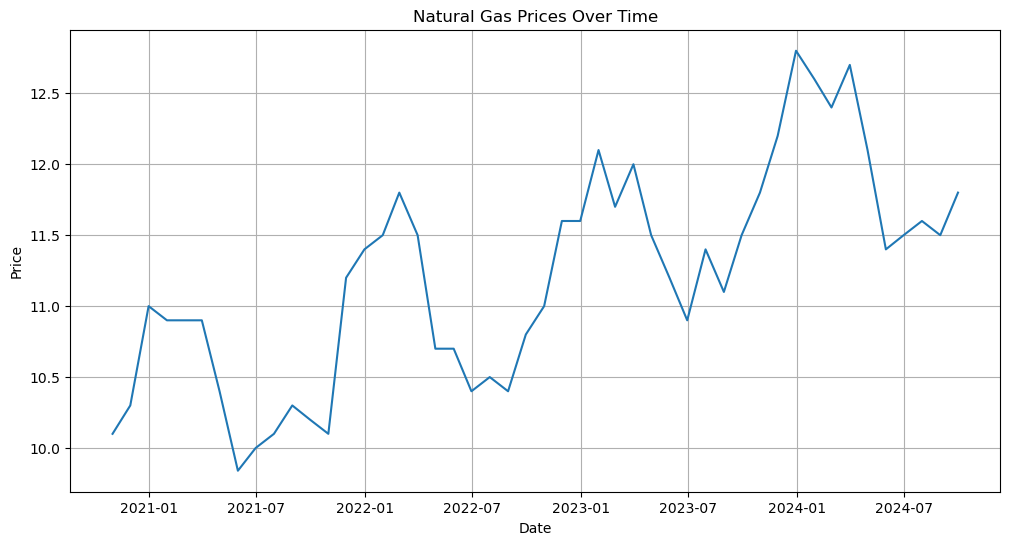

In [9]:
# ===============================
# 📌 4) Quick Plot
# ===============================
plt.figure(figsize=(12,6))
plt.plot(df['Prices'])
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
# ===============================
# 📌 6) Function to Estimate Price
# ===============================
def estimate_price(date_input):
    """
    Estimate price for given date.
    """
    date_input = pd.to_datetime(date_input)
    if date_input in df.index:
        return f"Historical price on {date_input.date()}: {df.loc[date_input]['Prices']:.2f}"
    elif date_input > df.index[-1]:
        steps_ahead = (date_input.year - df.index[-1].year) * 12 + (date_input.month - df.index[-1].month)
        if steps_ahead > 0:
            forecast = model_fit.forecast(steps=steps_ahead)
            return f"Forecasted price for {date_input.date()}: {forecast.iloc[-1]:.2f}"
        else:
            return "Date out of range."
    else:
        return "Date is before available data range."
